**1**.Importing The Dependencies

In [3]:
# importing operational libraries
import numpy as np
import pandas as pd

# importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# importing modeleing helpful libraries
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score ,confusion_matrix ,classification_report

# modeling libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# saving model libraries
import pickle

**D**ata **loading** & **understanding**

In [20]:
# read the csv file to pandas data frame
aut_df = pd.read_csv('train.csv')

**Initial** **Inspection**

In [6]:
aut_df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [7]:
aut_df.shape

(800, 22)

In [8]:
aut_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [9]:
aut_df['jaundice'].value_counts()

,count
jaundice,
no,615
yes,185


In [10]:
aut_df.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


In [11]:
# display all columns of a dataframe
pd.set_option('display.max_columns',None)

In [12]:
aut_df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,0,46.966113,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [13]:
# convert the age column to integer
aut_df['age'] = aut_df['age'].astype(int)
aut_df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [16]:
for col in aut_df.columns:
  numerical_features = ['ID','age','result']
  if col not in numerical_features:
    print(col , aut_df[col].unique())
    print("-"*50)


A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [21]:

aut_df

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,18 and more,Self,0


In [22]:
# dropping ID & age_desc columns
aut_df = aut_df.drop(columns = ['ID','age_desc'])

In [23]:
aut_df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,Self,0
796,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,Self,0
797,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,Self,0
798,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,Self,0


In [26]:
aut_df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [27]:
# defing the mapping dictionary for country names
mapping = {
    "Viet Nam":"Vietnam",
    "AmericanSamoa":"United States",
    "Hong Kong":"China"
}
# replace value in the country column
aut_df['contry_of_res'] = aut_df['contry_of_res'].replace(mapping)

In [28]:
aut_df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [29]:
# target class distribution
aut_df['Class/ASD'].value_counts()

,count
Class/ASD,
0,639
1,161


**Insights:**
1. missing values in ethnicity & relation.
2. age_desc column has only one unique value.so it has been removed.
3. identified imbalance in the target column.
4. Fixed country names.



**Exploratory Data Analysis**

In [30]:
aut_df.shape

(800, 20)

In [31]:
aut_df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [33]:
aut_df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,Self,0


In [35]:
aut_df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


Univariate Analysis

Numerical columns:
- age
- result

In [ ]:
# set the desired theme
sns.set_theme(style='darkgrid')

**Distributions Plots**

Mean Age: 28.452117626575
Median Age: 24.848350449999998


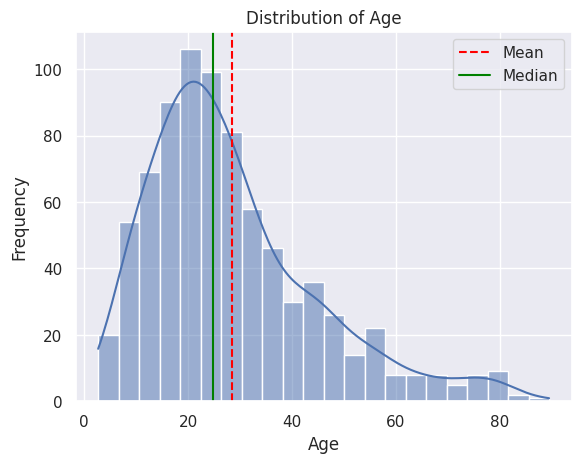

In [42]:
# Histogram for age
sns.histplot(aut_df['age'], kde = True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
# calculate the mean and the median
age_mean = aut_df['age'].mean()
age_median = aut_df['age'].median()
print(f'Mean Age: {age_mean}')
print(f'Median Age: {age_median}')
# add vertical lines for mean and median
plt.axvline(age_mean, color='red', linestyle = 'dashed', label = 'Mean')
plt.axvline(age_median , color = 'green', linestyle = '-', label = 'Median')
plt.legend()
plt.show()


Mean Result: 8.537303106501248
Median Result: 9.605299308


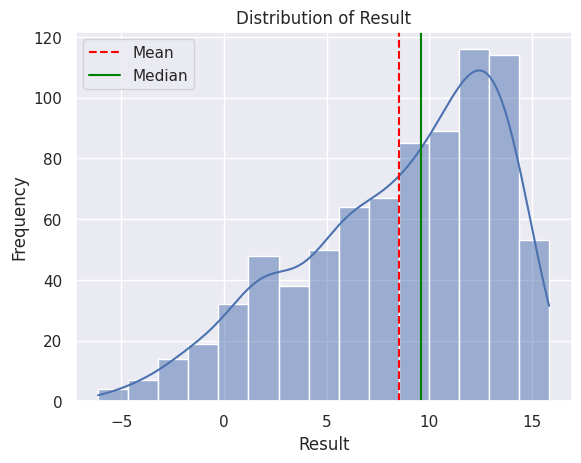

In [45]:
# Histogram for result
sns.histplot(aut_df['result'],kde = True)
plt.title('Distribution of Result')
plt.xlabel('Result')
plt.ylabel('Frequency')
# calculating the mean and the median
result_mean = aut_df['result'].mean()
result_median = aut_df['result'].median()
print(f'Mean Result: {result_mean}')
print(f'Median Result: {result_median}')
# plotting vertical lines for mean and median
plt.axvline(result_mean, color = 'red',linestyle= 'dashed',label ='Mean')
plt.axvline(result_median, color = 'green',linestyle = '-',label ='Median')
plt.legend()
plt.show()

**Box plots for identifying outliers in the numerical columns**

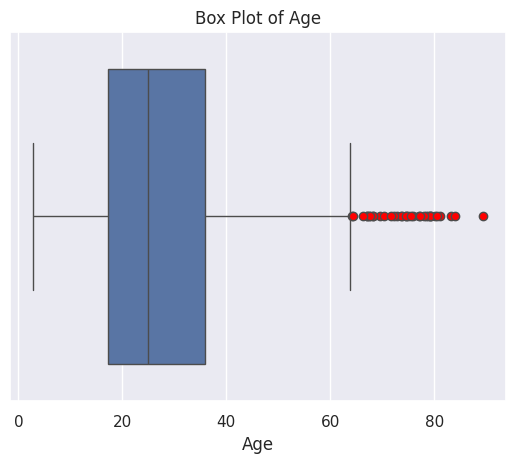

In [48]:
# red circles indicates to an outlier
sns.boxplot(x = aut_df['age'], flierprops=dict(markerfacecolor='red', marker='o'))
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

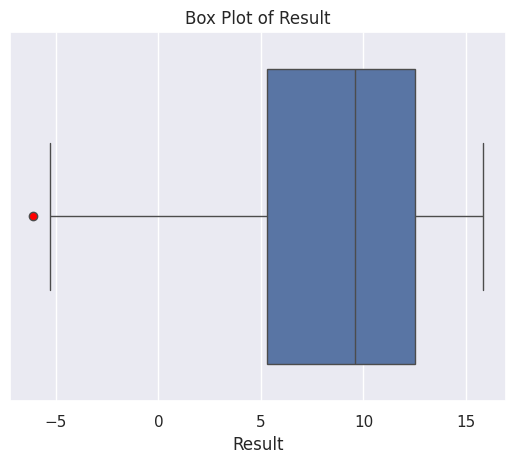

In [49]:
# red circles indicates to an outlier
sns.boxplot(x = aut_df['result'], flierprops=dict(markerfacecolor='red', marker='o'))
plt.title('Box Plot of Result')
plt.xlabel('Result')
plt.show()

In [53]:
# count the outliers for age using IQR method
q1 = aut_df['age'].quantile(0.25)
q3 = aut_df['age'].quantile(0.75)
iqr = q3-q1
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
age_outliers = aut_df[(aut_df['age'] > upper_limit) | (aut_df['age'] < lower_limit)]

In [51]:
len(age_outliers)

35

In [54]:
# count the outliers for result using IQR method
q1 = aut_df['result'].quantile(0.25)
q3 = aut_df['result'].quantile(0.75)
iqr = q3-q1
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
result_outliers = aut_df[(aut_df['result'] > upper_limit) | (aut_df['result'] < lower_limit)]

In [56]:
len(result_outliers)

1

**Univariate analysis of Categorical features**

In [57]:
aut_df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

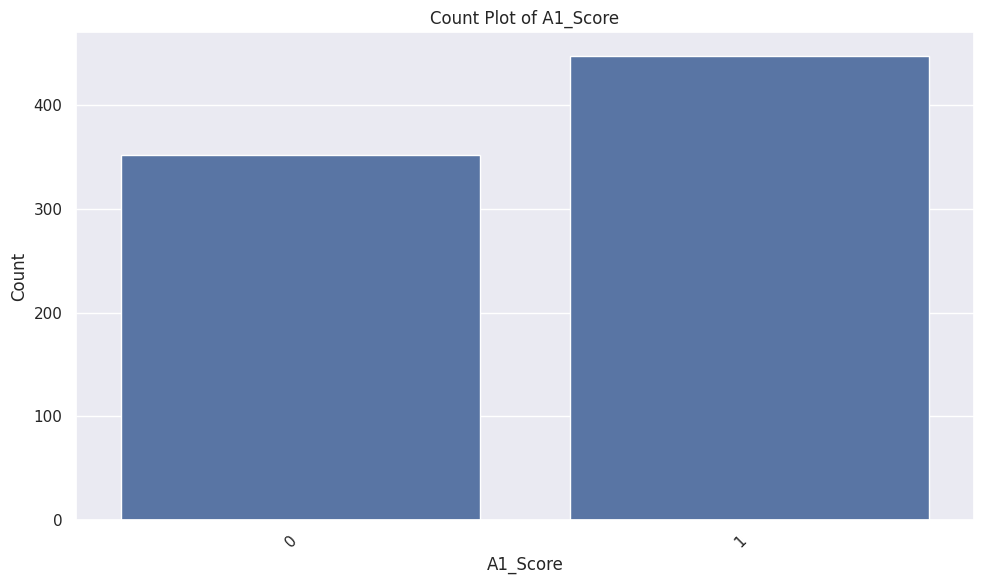

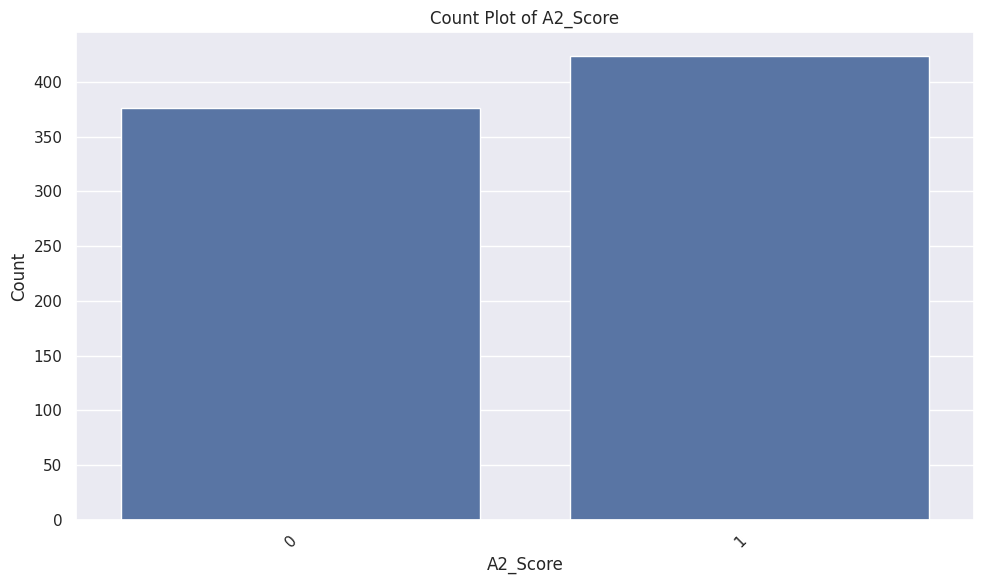

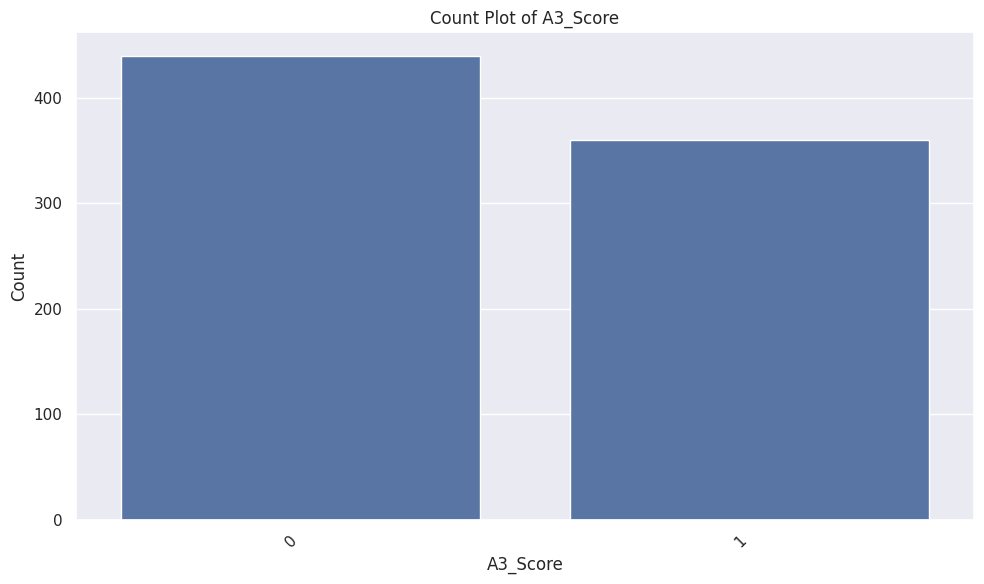

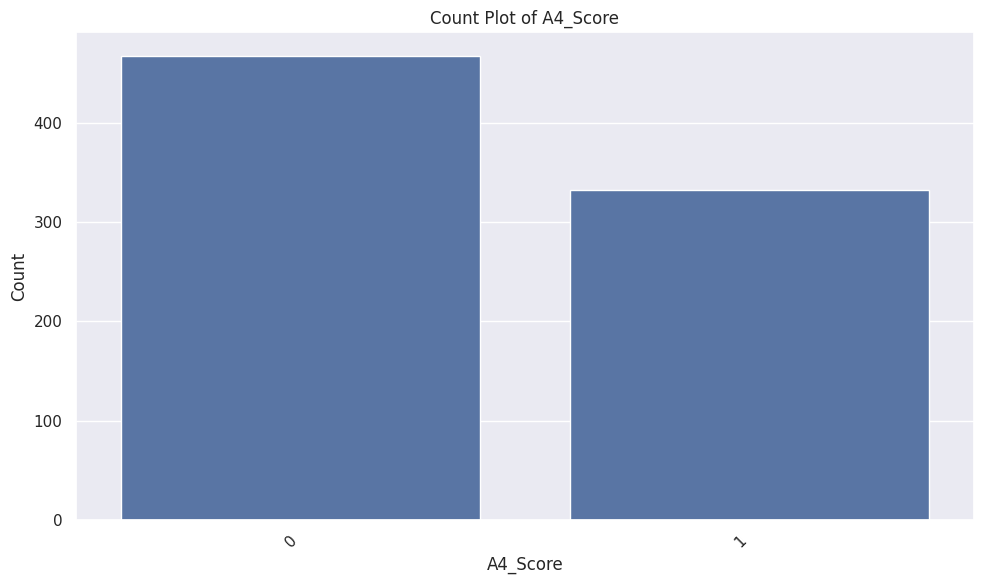

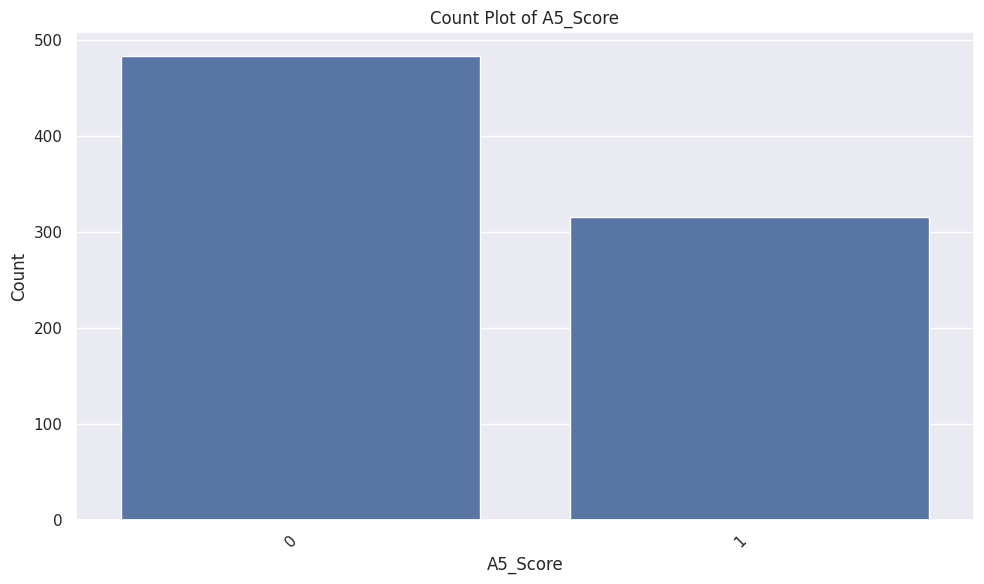

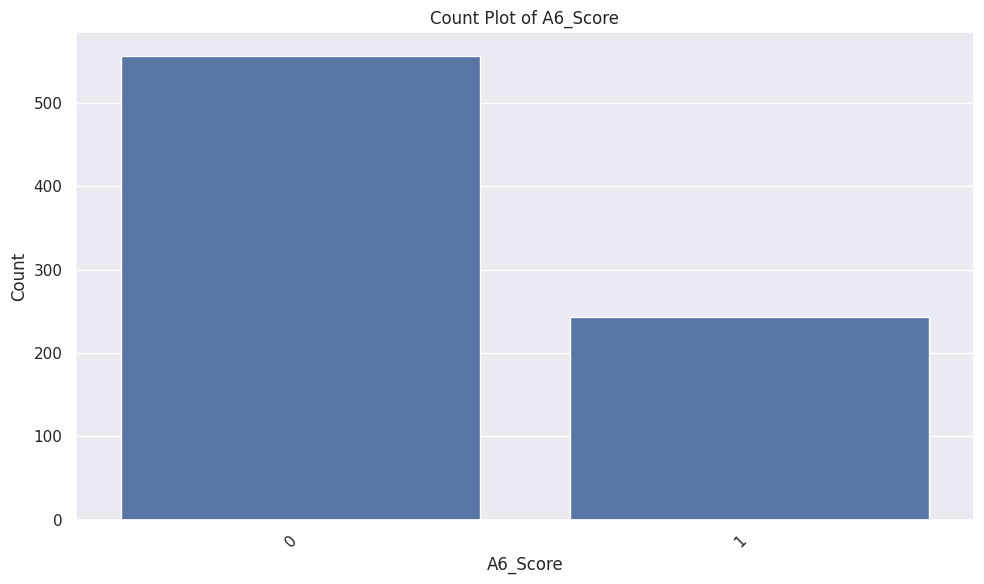

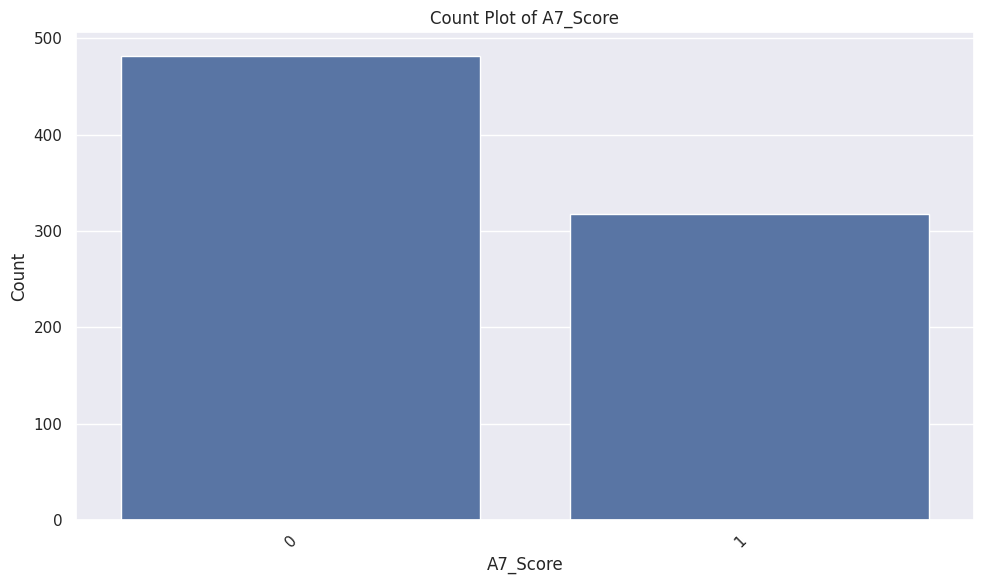

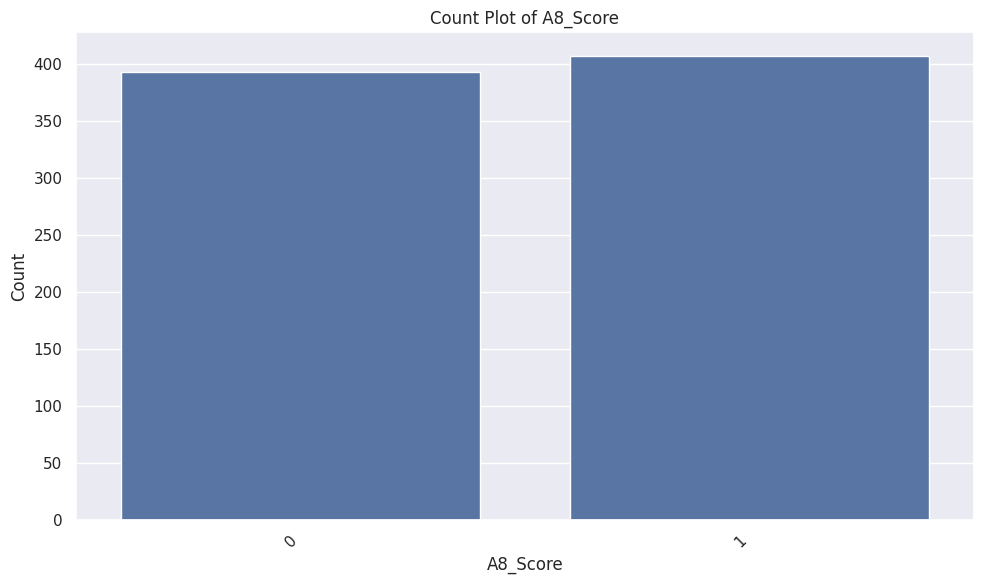

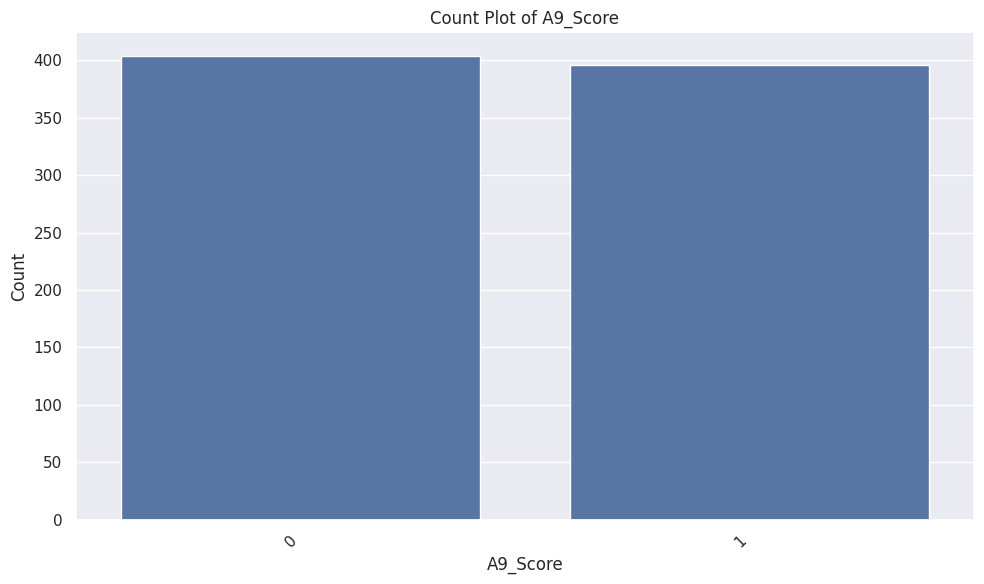

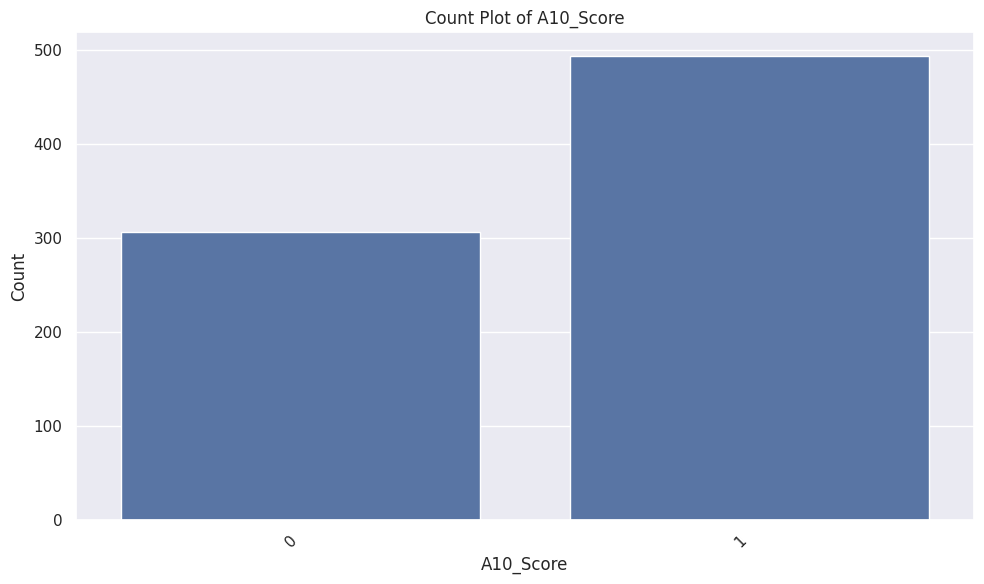

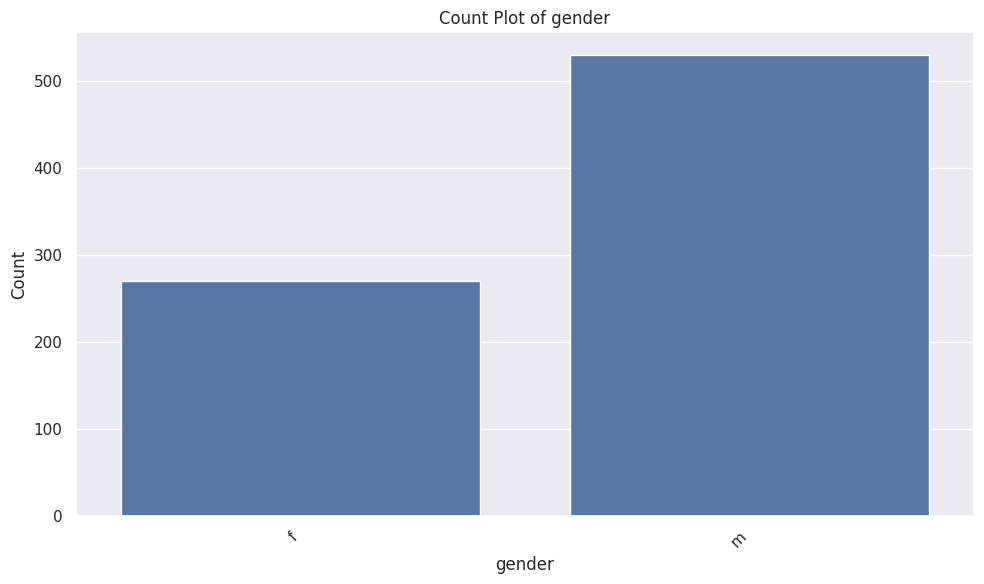

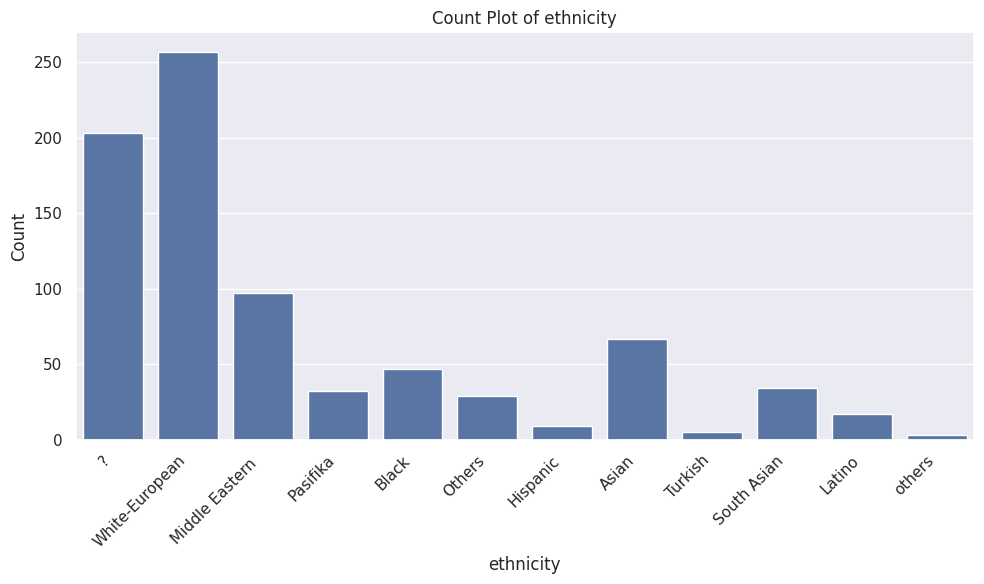

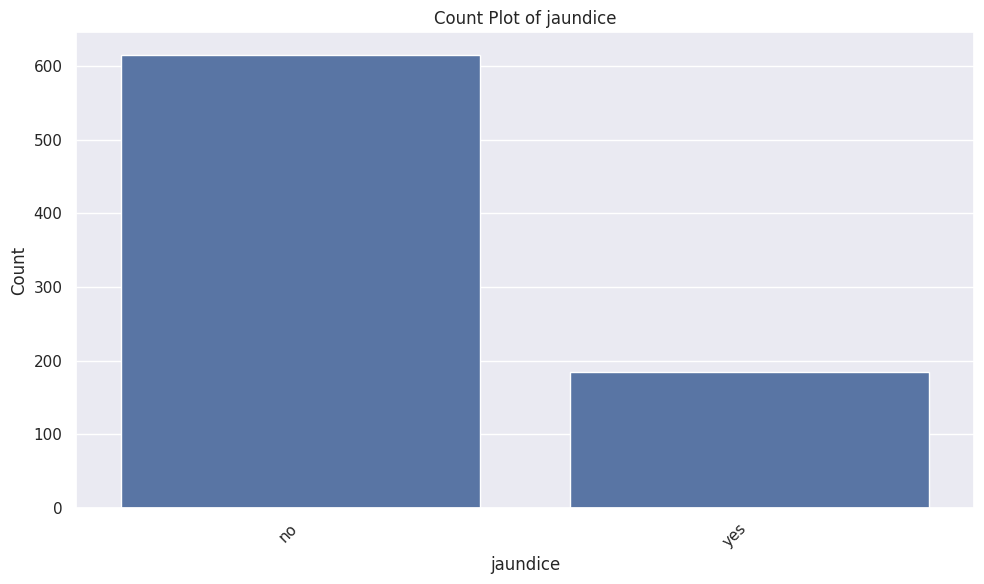

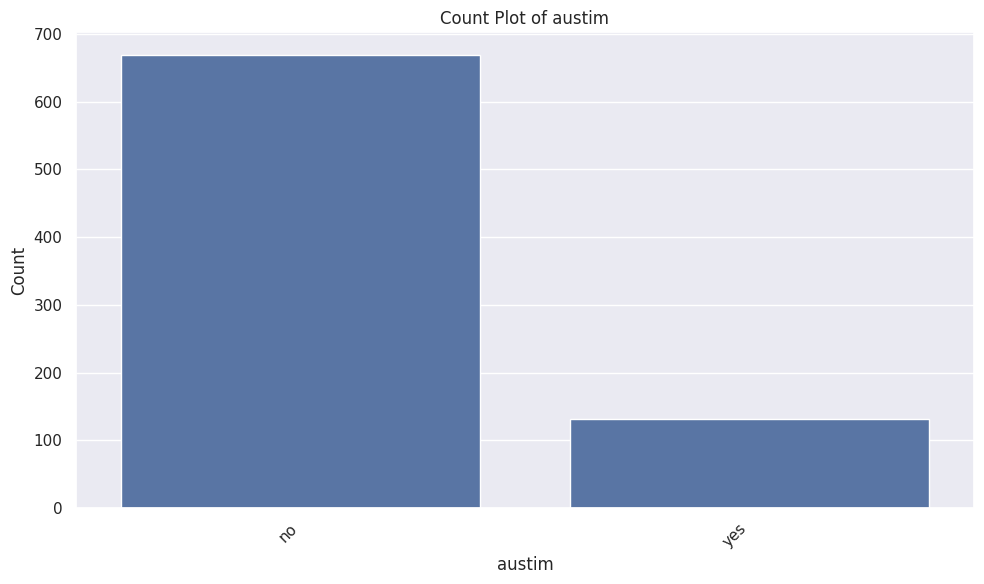

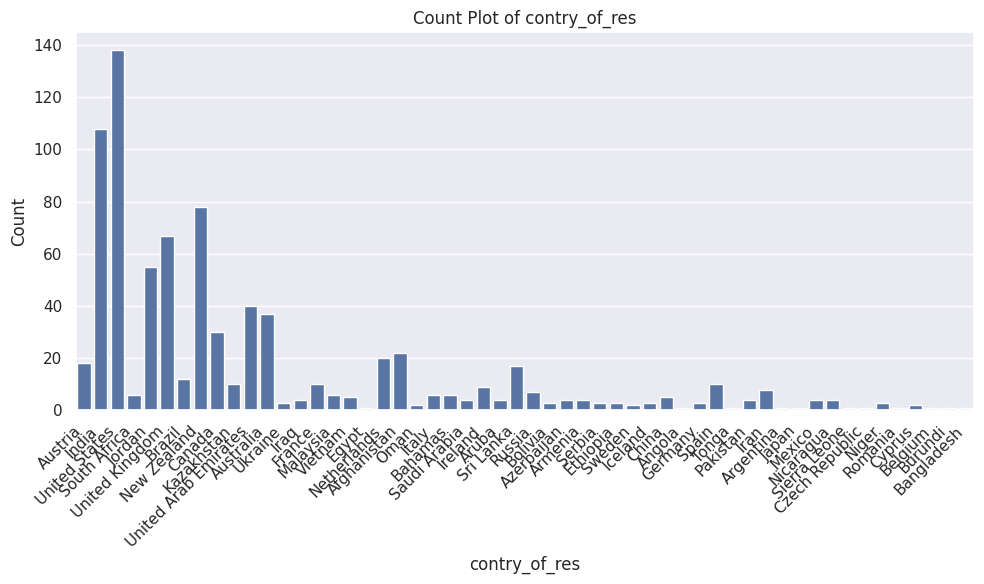

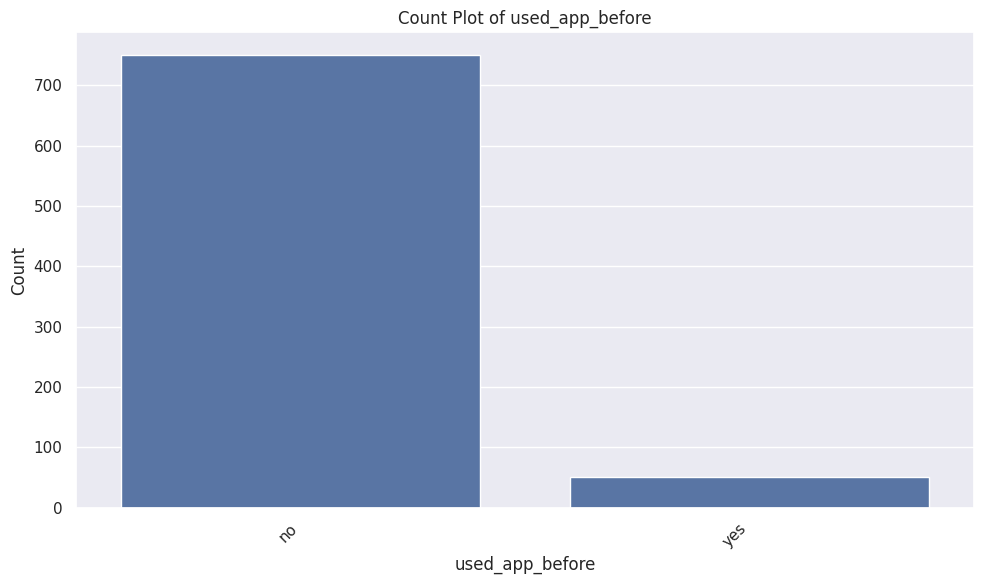

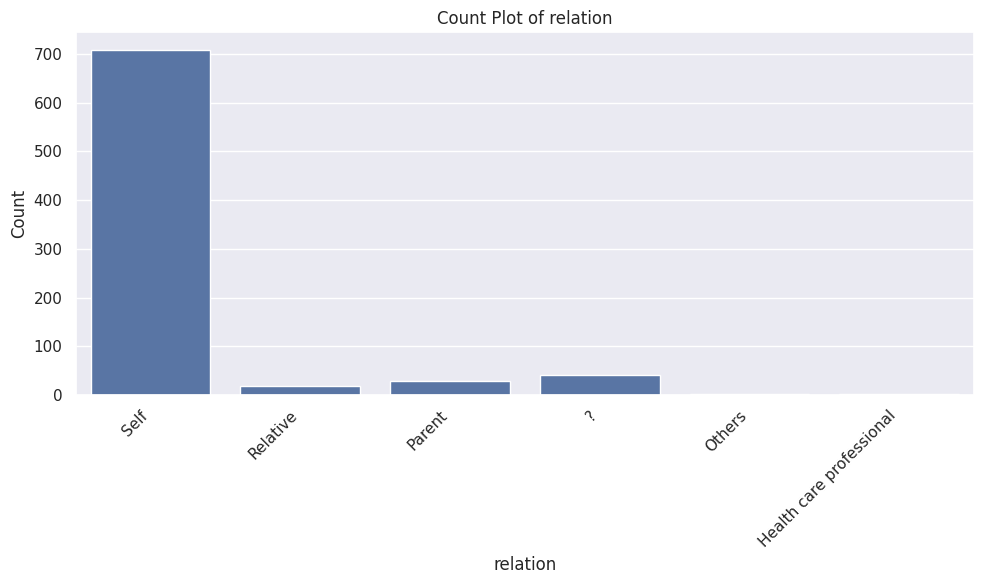

In [59]:
cat_cols = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score','gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'relation']
for col in cat_cols:
  plt.figure(figsize=(10, 6)) # Add this line to create a new figure for each plot
  sns.countplot(x = aut_df[col])
  plt.title(f'Count Plot of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
  plt.tight_layout() # Adjust layout to prevent labels from overlapping
  plt.show()

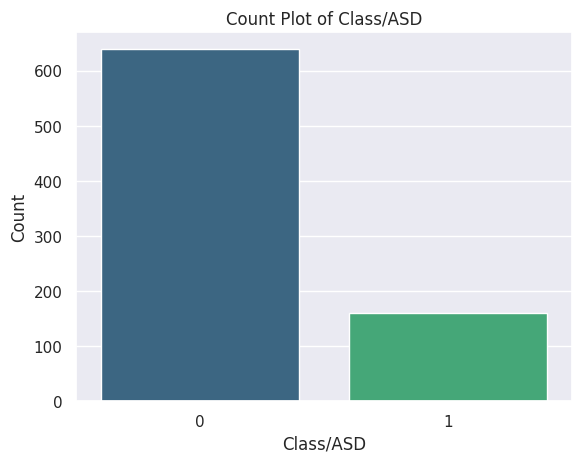

In [61]:
# coutplot for target column
sns.countplot(x = aut_df['Class/ASD'], hue = aut_df['Class/ASD'], palette = 'viridis', legend = False)
plt.xlabel('Class/ASD')
plt.ylabel('Count')
plt.title('Count Plot of Class/ASD')
plt.show()

In [62]:
aut_df['Class/ASD'].value_counts()

,count
Class/ASD,
0,639
1,161


Handling misssing values in ethnicity and relation columns

In [63]:
print(aut_df['ethnicity'].unique())
print(aut_df['relation'].unique())

['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
['Self' 'Relative' 'Parent' '?' 'Others' 'Health care professional']


There is ? mark in both of them , and in ethnicity others is redundunt.

In [67]:
# fixing missing values and o_small others
aut_df['ethnicity'] = aut_df['ethnicity'].replace({"?":"Others","others":"Others"})
aut_df['relation'] = aut_df['relation'].replace(
    {"?":"Others",
     "Parent":"Others",
     "Health care professional":"Others",
     "Relative":"Others"}
)

In [69]:
# Unique values after fixing
print(aut_df['ethnicity'].unique())
print(aut_df['relation'].unique())

['Others' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Hispanic'
 'Asian' 'Turkish' 'South Asian' 'Latino']
['Self' 'Others']


**Label Encoding**

In [70]:
aut_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         800 non-null    int64  
 1   A2_Score         800 non-null    int64  
 2   A3_Score         800 non-null    int64  
 3   A4_Score         800 non-null    int64  
 4   A5_Score         800 non-null    int64  
 5   A6_Score         800 non-null    int64  
 6   A7_Score         800 non-null    int64  
 7   A8_Score         800 non-null    int64  
 8   A9_Score         800 non-null    int64  
 9   A10_Score        800 non-null    int64  
 10  age              800 non-null    float64
 11  gender           800 non-null    object 
 12  ethnicity        800 non-null    object 
 13  jaundice         800 non-null    object 
 14  austim           800 non-null    object 
 15  contry_of_res    800 non-null    object 
 16  used_app_before  800 non-null    object 
 17  result          

In [71]:
# identify columns with object data type
object_cols = aut_df.select_dtypes(include='object').columns

In [72]:
print(object_cols)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [73]:
# initialize a dictionary to store the encoders
encoders = {}
# apply label encoding and store the encoders
for col in object_cols:
  le = LabelEncoder()
  aut_df[col] = le.fit_transform(aut_df[col])
  encoders[col] = le
# save the encoders as a pickle file
with open('label_encoders.pkl', 'wb') as f:
  pickle.dump(encoders, f)



In [74]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [75]:
aut_df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.172746,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.750517,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.380373,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.561927,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.205790,1,5,0,0,44,0,-4.777286,1,0


**Bivariate analysis**

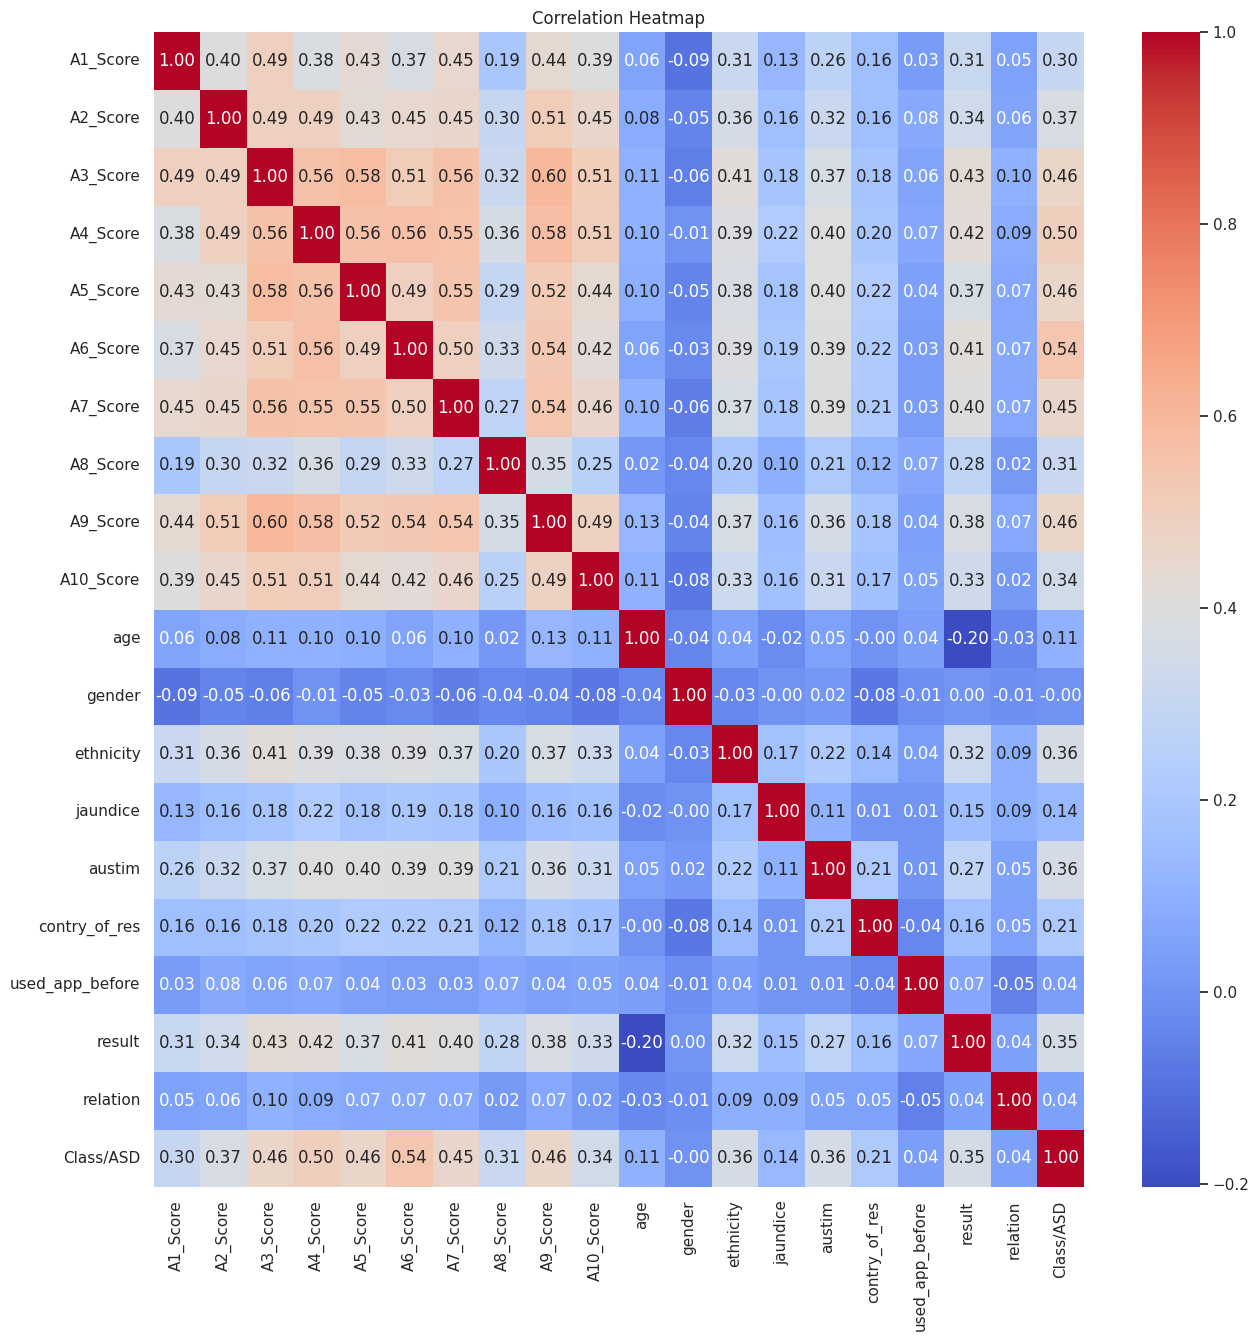

In [78]:
# correlation matrix
plt.figure(figsize = (15,15))
sns.heatmap(aut_df.corr(),annot = True, cmap = 'coolwarm',fmt = ".2f")
plt.title('Correlation Heatmap')
plt.show()


As we don't have highly correlated columns we don't have to drop anyone.

**Insights from EDA:**
- There are few outliers in the numerical features(age,resulst).
- There is a class imbalance in the target column.
- There is a class imbalance in the categorical features.
- We don't have any highly correlated columns.
- Performed label encoding and saved the encoders.
- Handling missing values and correcting some features like(ethnicity,relation).

**Data preprocessing**

Handling the outliers.

In [80]:
# function to replace the outliers with the median values.
def replace_outliers_with_median(df, col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3-q1

  upper_limit = q3 + 1.5*iqr
  lower_limit = q1 - 1.5*iqr

  median = df[col].median()
# replace outliers with median
  df[col] = df[col].apply(lambda x: median if x > upper_limit or x < lower_limit else x)
  return df


In [81]:
# replace the outliers in the age column
aut_df = replace_outliers_with_median(aut_df, 'age')
# replace the outliers in the result column
aut_df = replace_outliers_with_median(aut_df, 'result')

In [82]:
aut_df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.172746,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.750517,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.380373,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.561927,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.205790,1,5,0,0,44,0,-4.777286,1,0


In [83]:
aut_df.shape

(800, 20)

**Train Test Split**

In [84]:
aut_df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [85]:
X = aut_df.drop('Class/ASD',axis = 1)
y = aut_df['Class/ASD']


In [86]:
print(X)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         0         1         0         0         0         0         0   
796         0         1         1         0         0         1         0   
797         0         0         0         0         0         0         0   
798         0         0         0         0         0         0         0   
799         0         1         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score        age  gender  ethnicity  jaundice 

In [87]:
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64


In [88]:
X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size = .2 ,stratify = y, random_state = 42)


In [89]:
print(X_train.shape , X_test.shape , y_train.shape , y_test.shape )

(640, 19) (160, 19) (640,) (160,)


In [90]:
y_train.value_counts()

,count
Class/ASD,
0,511
1,129


In [91]:
y_test.value_counts()

,count
Class/ASD,
0,128
1,32


SMOTE (Synthetic Minority Oversampling technique)

In [92]:
smote = SMOTE(random_state = 42)
X_train_smote , y_train_smote = smote.fit_resample(X_train , y_train)
print(X_train_smote.shape)
print(y_train_smote.shape)

(1022, 19)
(1022,)


In [94]:
y_train_smote.value_counts()

,count
Class/ASD,
0,511
1,511


**Model Training**

In [95]:
# list of classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(random_state = 42),
    "Random Forest": RandomForestClassifier(random_state = 42),
    "XGBoost": XGBClassifier(random_state = 42)
}


In [96]:
# dictionary to store the cross validation results
cv_scores = {}
# perform 5_fold cross validation for each model
for model_name,model in models.items():
  print(f"Training {model_name} with default parameters...")
  scores = cross_val_score(model,X_train_smote,y_train_smote,cv=5,scoring = 'accuracy')
  cv_scores[model_name] = scores
  print(f"{model_name} cross validation Accuracy score: {np.mean(scores):.2f}")
  print("-"*50)

Training Decision Tree with default parameters...
Decision Tree cross validation Accuracy score: 0.86
--------------------------------------------------
Training Random Forest with default parameters...
Random Forest cross validation Accuracy score: 0.91
--------------------------------------------------
Training XGBoost with default parameters...
XGBoost cross validation Accuracy score: 0.90
--------------------------------------------------


In [97]:
cv_scores

{'Decision Tree': array([0.82926829, 0.85365854, 0.89215686, 0.84313725, 0.87254902]),
 'Random Forest': array([0.87804878, 0.90243902, 0.93627451, 0.91666667, 0.93137255]),
 'XGBoost': array([0.86341463, 0.88292683, 0.92647059, 0.92647059, 0.92156863])}

**Model Selection & Hyperparameter Tuning**




In [101]:
# initializing models
decision_tree = DecisionTreeClassifier(random_state =42)
random_forest = RandomForestClassifier(random_state = 42)
xgboost_classifier = XGBClassifier(random_state = 42)

In [100]:
# Hyperparameters grids for RandomizedSearchCV
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 0,20,30,50,70],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1,2,4]
}

param_grid_rf = {
    'n_estimators': [50,100,200,500],
    'max_depth': [None, 10,20,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1,2,4],
    'bootstrap':[True,False]
}

param_grid_xgb = {
    'n_estimators': [50,100,200,500],
    'max_depth': [3, 5, 7,10],
    'min_child_weight': [1, 3, 5],
    'learning_rate': [0.01,0.1,.2,.3],
    'subsample': [0.5,0.7,1.0],
    'colsample_bytree': [0.5,0.7,1.0]
}


In [102]:
# hyperparameter tuning for 3 tree based models

# the below steps can be automated by for loop or a pipeline

# perform RandomizedSearchCV for each model
randomized_search_dt = RandomizedSearchCV(estimator = decision_tree , param_distributions= param_grid_dt,scoring = 'accuracy',cv = 5, n_iter = 20,random_state = 42)
randomized_search_rf = RandomizedSearchCV(estimator = random_forest , param_distributions= param_grid_rf,scoring = 'accuracy',cv = 5, n_iter = 20,random_state = 42)
randomized_search_xgb = RandomizedSearchCV(estimator= xgboost_classifier , param_distributions= param_grid_xgb,scoring = 'accuracy',cv = 5, n_iter = 20, random_state = 42)






In [103]:
# fit the models
randomized_search_dt.fit(X_train_smote,y_train_smote)
randomized_search_rf.fit(X_train_smote,y_train_smote)
randomized_search_xgb.fit(X_train_smote,y_train_smote)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [107]:
# get the best score model
best_model = None
best_score = 0
if randomized_search_dt.best_score_ > best_score:
  best_model = randomized_search_dt.best_estimator_
  best_score = randomized_search_dt.best_score_
if randomized_search_rf.best_score_ > best_score:
  best_model = randomized_search_rf.best_estimator_
  best_score = randomized_search_rf.best_score_
if randomized_search_xgb.best_score_ > best_score:
  best_model = randomized_search_xgb.best_estimator_
  best_score = randomized_search_xgb.best_score_


In [108]:
print(f"Best Model: {best_model}")
print(f"Best cross_validation Accuracy : {best_score:.2f}")


Best Model: RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=50,
                       random_state=42)
Best cross_validation Accuracy : 0.92


In [109]:
# save the best model
with open('best_model.pkl','wb') as f:
  pickle.dump(best_model,f)

**Model Evaluation**

In [111]:
# evaluate on test data set
y_test_pred = best_model.predict(X_test)
print("Accuracy Score:\n ", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n ", confusion_matrix(y_test, y_test_pred))
print("Classification report:\n ", classification_report(y_test, y_test_pred))



Accuracy Score:
  0.825
Confusion Matrix:
  [[113  15]
 [ 13  19]]
Classification report:
                precision    recall  f1-score   support

           0       0.90      0.88      0.89       128
           1       0.56      0.59      0.58        32

    accuracy                           0.82       160
   macro avg       0.73      0.74      0.73       160
weighted avg       0.83      0.82      0.83       160



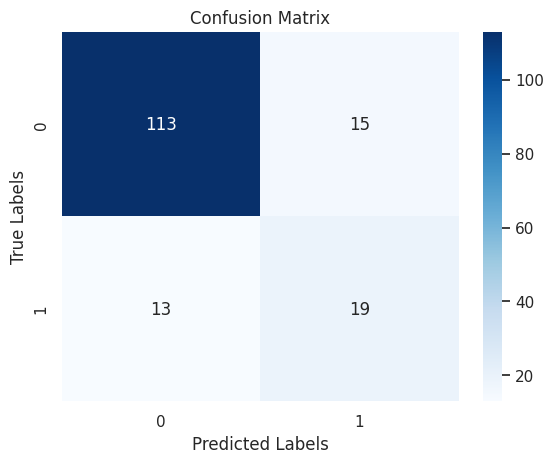

In [112]:
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


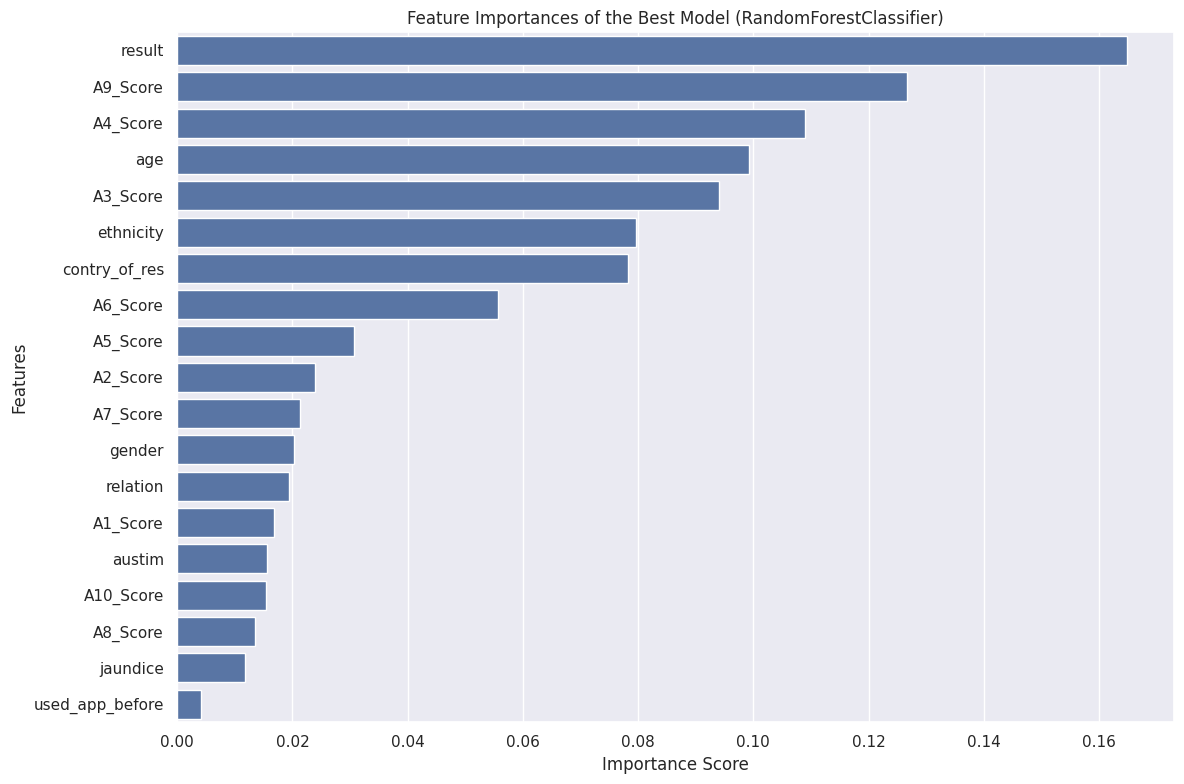

In [113]:
# Get feature importances from the best model
feature_importances = best_model.feature_importances_

# Get feature names from the training data (X_train_smote or X)
feature_names = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances of the Best Model (RandomForestClassifier)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()